In [ ]:
pip install fastai

In [3]:
from fastai.vision import *

In [76]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
from os import listdir
import matplotlib.pyplot as plt
import numpy as np
from fastai import *
from fastai.vision import *
from pathlib import Path
from keras.preprocessing.image import ImageDataGenerator
import warnings
import pickle
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
warnings.filterwarnings('ignore')

In [77]:
#Set Parameter
EPOCHS = 25
INIT_LR = 1e-3
BS = 32
default_image_size = tuple((256, 256))
image_size = 0
directory_root ='train'
directory_2= 'test_imgs'
width=256
height=256
depth=3

In [78]:
# # create a data generator
datagen = ImageDataGenerator()

In [79]:
# # load and iterate training dataset
train_it = datagen.flow_from_directory(directory_root, 
                                        class_mode='binary', batch_size=64)

Found 44016 images belonging to 40 classes.


In [80]:
np.random.seed(8)
bs = 64
tfms = get_transforms(flip_vert=True, max_warp=0)

data = ImageDataBunch.from_folder(directory_root, 
                                  valid_pct=0.2,
                                  train=".",
#                                   test="../test images",
                                  ds_tfms=tfms,
                                  size=224,bs=bs, 
                                  num_workers=0).normalize(imagenet_stats)


['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

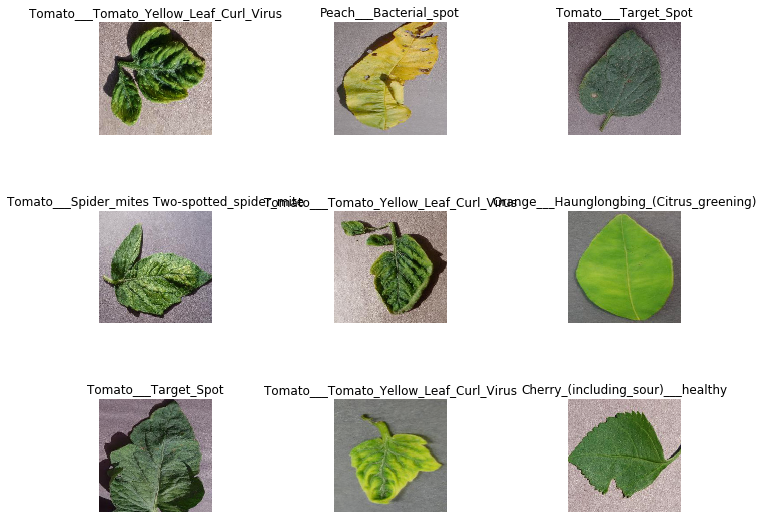

In [81]:
data.show_batch(rows=3, figsize=(10,8))
label_list = data.classes
label_list

In [82]:
# Training
from fastai.metrics import error_rate # 1 - accuracy
learn = create_cnn(data, models.resnet34, metrics=accuracy)

In [11]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.261561,0.139192,0.953993,05:18


In [12]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.225359,0.133326,0.955470,05:20
1,0.170816,0.082072,0.972850,05:26
2,0.113246,0.058147,0.980007,05:19
3,0.082028,0.048742,0.983528,05:20


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


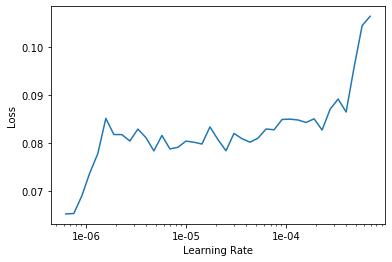

In [13]:
# Find the learning rate
learn.unfreeze() # must be done before calling lr_find
learn.lr_find()
learn.recorder.plot()

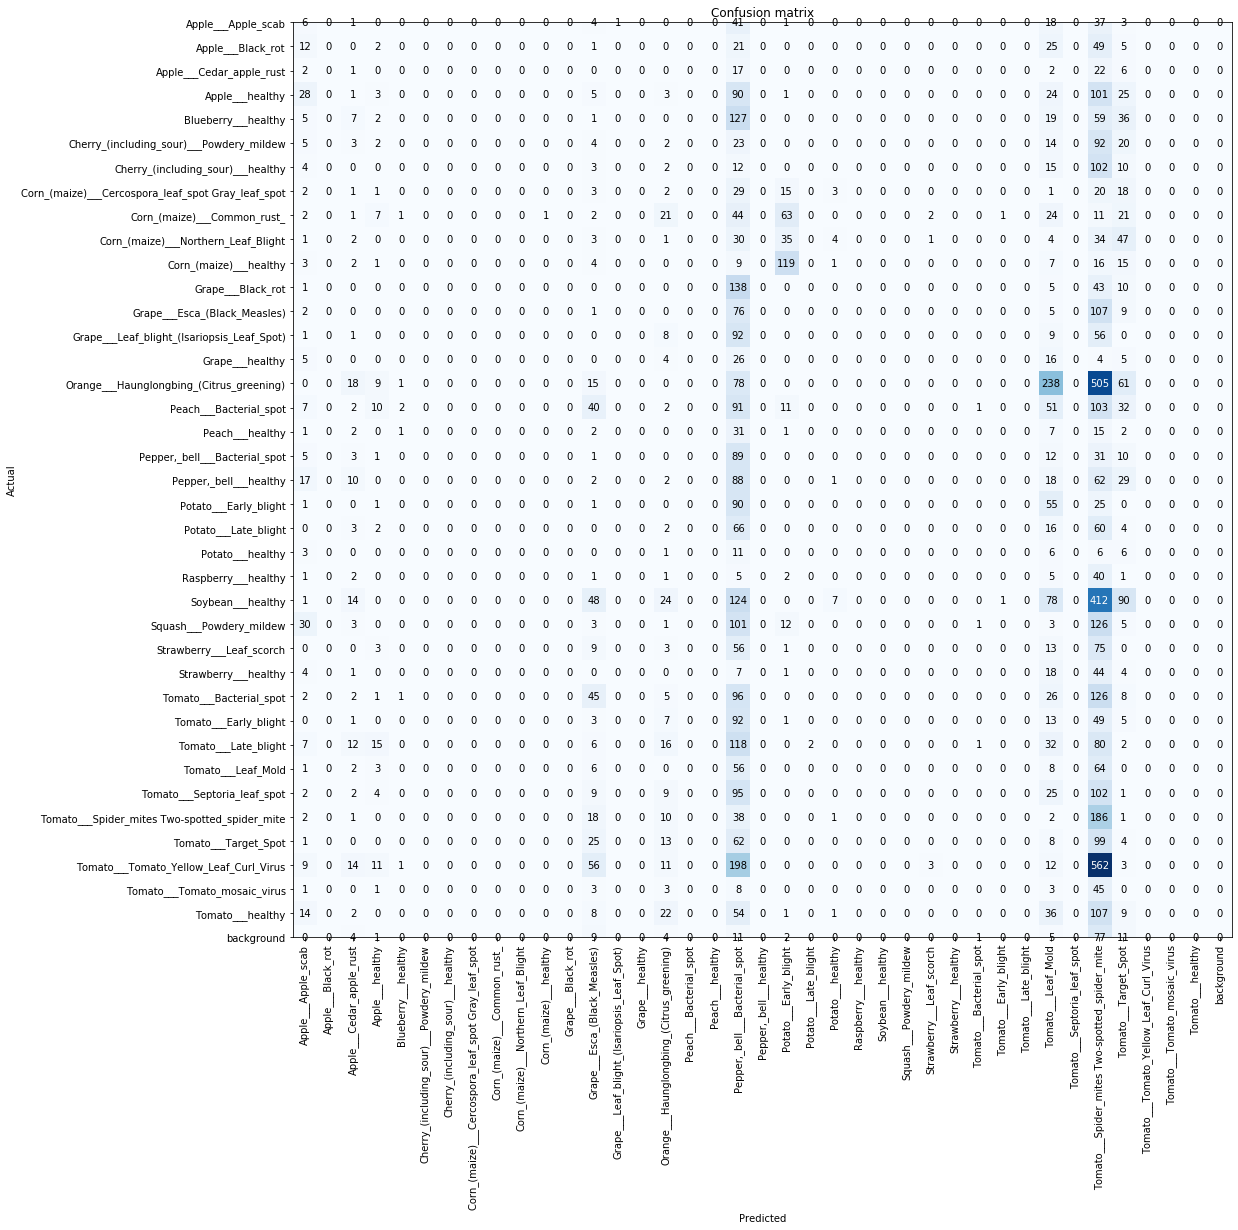

In [86]:
interp.plot_confusion_matrix(figsize=(28,17))

In [15]:
learn.fit_one_cycle(8,max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.065497,0.042077,0.985914,05:59
1,0.069740,0.037083,0.988527,05:59
2,0.053619,0.028164,0.991026,05:59
3,0.030326,0.022064,0.993411,06:00
4,0.038158,0.019822,0.993298,06:42
5,0.026234,0.017531,0.994547,07:57
6,0.016811,0.015522,0.994434,08:05
7,0.012487,0.014921,0.995229,08:10


In [52]:
# Lets save the model 
learn.save('plant-village-ai')

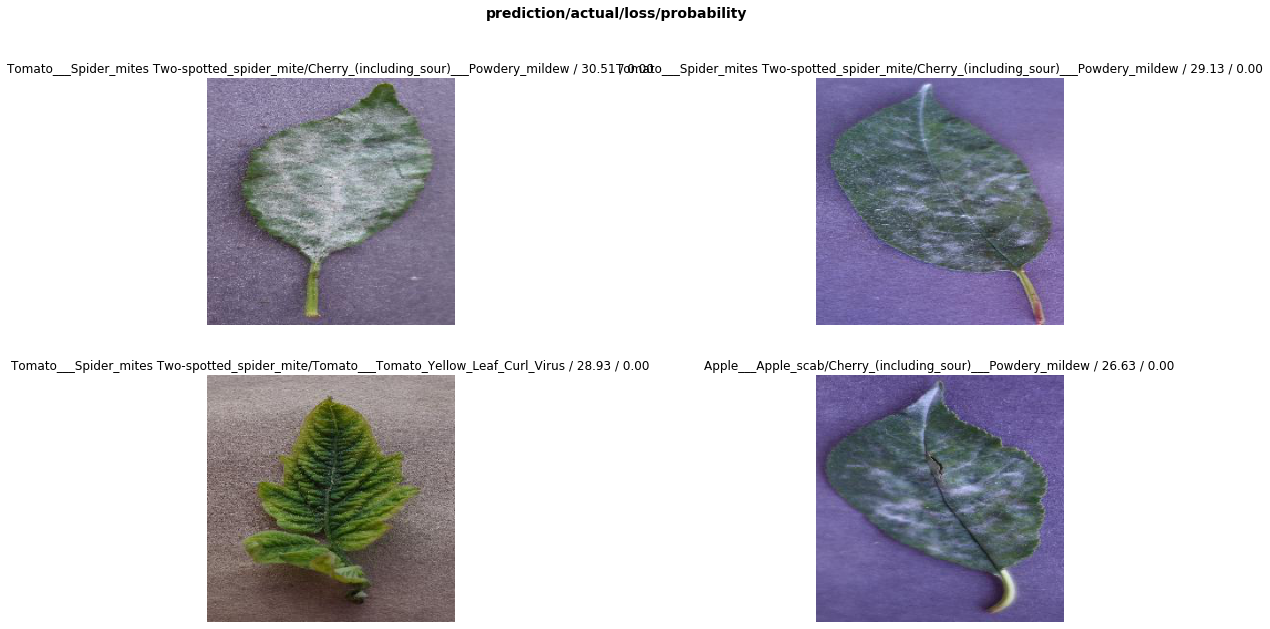

In [90]:
#INTERPRETATION
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(4, figsize=(20,10))

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

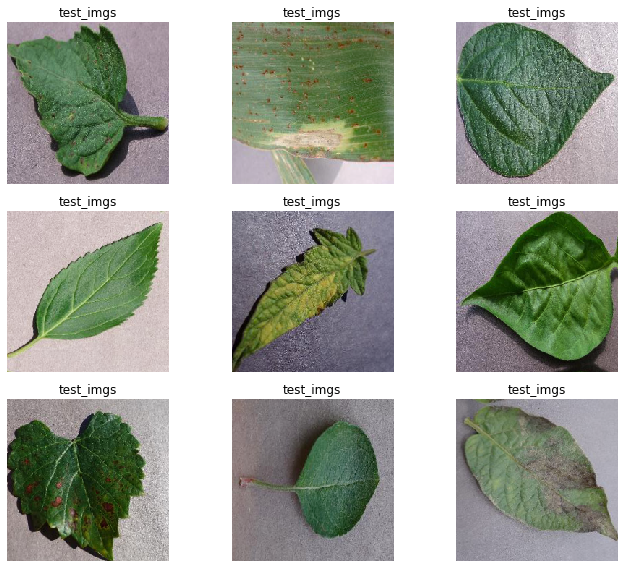

In [91]:

# Testing

np.random.seed(8)
bs = 64
tfms = get_transforms(flip_vert=True, max_warp=0)


test_set = ImageDataBunch.from_folder(directory_2, 
                                  valid_pct=0.2,
                                  train=".",
      #                            test=test_imgs,
                                  ds_tfms=tfms,
                                  size=224,bs=bs, 
                                  num_workers=0).normalize(imagenet_stats)



test_set.show_batch(rows=3, figsize=(10,8))

label_list_test = data.classes
label_list_test
# img = learn.data.train_ds[0][0]
# learn.predict(img)

In [ ]:
# learn.data = (
#     ImageList
#         .from_csv(PATH, 'train_v2.csv', folder="train-jpg", suffix=".jpg")
#         .random_split_by_pct(0.2)
#         .label_from_df(sep=' ')
#         .add_test_folder('test-jpg')
#         .transform(tfms, size=256)
#         .databunch(bs=32)
#         .normalize(imagenet_stats)
# )

In [92]:
logs_preds_test = learn.get_preds(ds_type = 'test_imgs')
logs_preds_test[0][0]

tensor([3.2826e-03, 5.2762e-05, 7.2001e-03, 1.2681e-01, 9.1694e-06, 2.8521e-09,
        8.8138e-06, 1.3034e-06, 2.3786e-08, 2.5462e-07, 6.1453e-05, 1.9492e-05,
        5.7754e-03, 6.6120e-07, 1.1527e-11, 2.0625e-02, 2.6691e-06, 8.7489e-06,
        6.5302e-01, 4.9630e-06, 1.3521e-03, 1.3260e-05, 5.3307e-06, 3.7806e-05,
        2.7750e-08, 3.4603e-08, 4.7098e-04, 8.1774e-08, 3.2812e-03, 8.7508e-06,
        6.2418e-06, 3.3222e-02, 5.9353e-06, 1.2777e-01, 1.6942e-02, 4.9872e-11,
        3.3450e-08, 8.5352e-08, 1.1945e-06])

In [ ]:
# data_test = ImageDataBunch.from_folder(logs_preds_test, 
                                  valid_pct=0.2)


In [ ]:
logs_preds_test.show_batch(rows=3, figsize=(10,8))
label_list_test = logs_preds_test.classes
label_list_test